In [1]:
# Load libraries
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Importing Data
more_metadata=pd.DataFrame.from_csv('Whole_mets.csv')
second_genome=pd.DataFrame.from_csv('second_genome_2.csv')
second_genome.index=second_genome.index.astype('float64')
print (second_genome.shape)
discovery_mets=pd.DataFrame.from_csv('data_discovery.csv')
discovery_mets.index=discovery_mets.index.astype('float64')
print (discovery_mets.shape)

(540, 667)
(399, 663)


# Discovery Cohort Analysis Figure 2

In [3]:
#Scale and standardize metabolites
X = discovery_mets[discovery_mets.columns[0:659]]
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Xcolumns=X.columns
Xindex=discovery_mets.index
X = scaler.fit_transform(X)
X=pd.DataFrame(data=X,columns=Xcolumns,index=Xindex)
print (X.shape)

(399, 659)


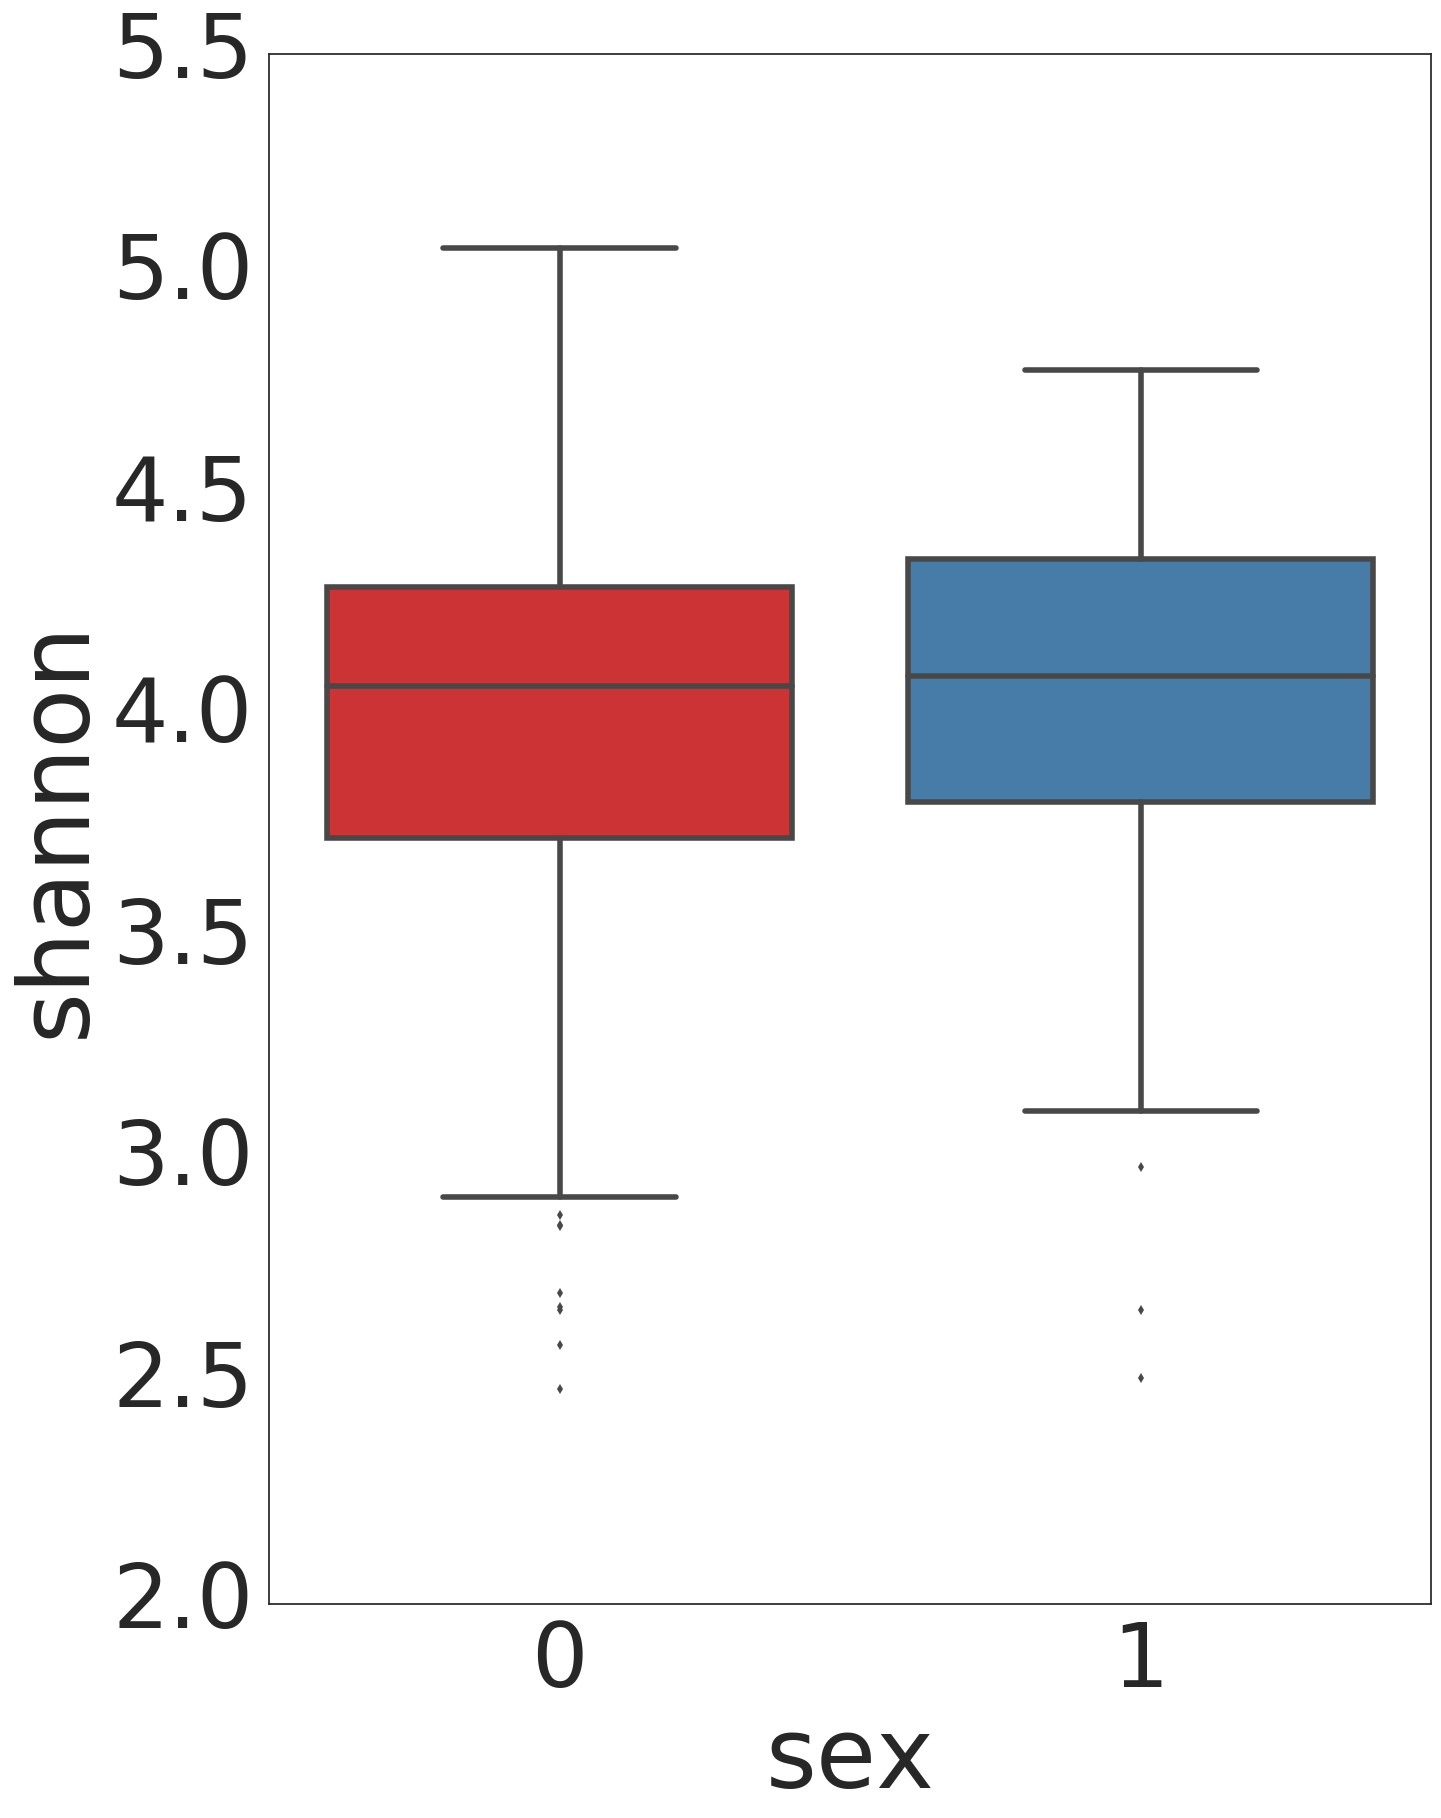

In [4]:
#Generate boxplot for figure 2A
discovery_mets['_5alpha']=X['root.metabolite.scaled.lipid.steroid.5alpha-androstan-3beta,17alpha-diol disulfate:scaled']
discovery_mets['Age']=more_metadata['Age']
discovery_mets['BMI']=more_metadata['BMI']
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[15,20], dpi=100)
plt.ylim(2,5.5)
meanlineprops = dict(linestyle='-', linewidth=3, color='Red')
ax=sns.boxplot(y=discovery_mets['shannon'],x=discovery_mets['sex'],order=[0,1], meanprops=meanlineprops,palette='Set1',showfliers=True,linewidth=4, meanline=True,showmeans=False)

In [5]:
#Regression analysis of differences in shannon diversity across sex, adjusted for BMI and age.
results = smf.ols('shannon ~ BMI+Age+sex', data=discovery_mets).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                shannon   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           1.39e-07
Time:                        04:01:40   Log-Likelihood:                -232.44
No. Observations:                 399   AIC:                             472.9
Df Residuals:                     395   BIC:                             488.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3172      0.133     32.400      0.000       4.055       4.579
BMI           -0.0182      0.003     -5.671      0.000      -0.024      -0.012
Age            0.0039      0.002      1.801      0.072      -0.000       0.008
sex            0.0433      0.049      0.882      0.379      -0.053       0.140
==============================================================================
Omnibus:                       32.913   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.695
Skew:                          -0.723   Prob(JB):                     3.96e-09
Kurtosis:                       3.484   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

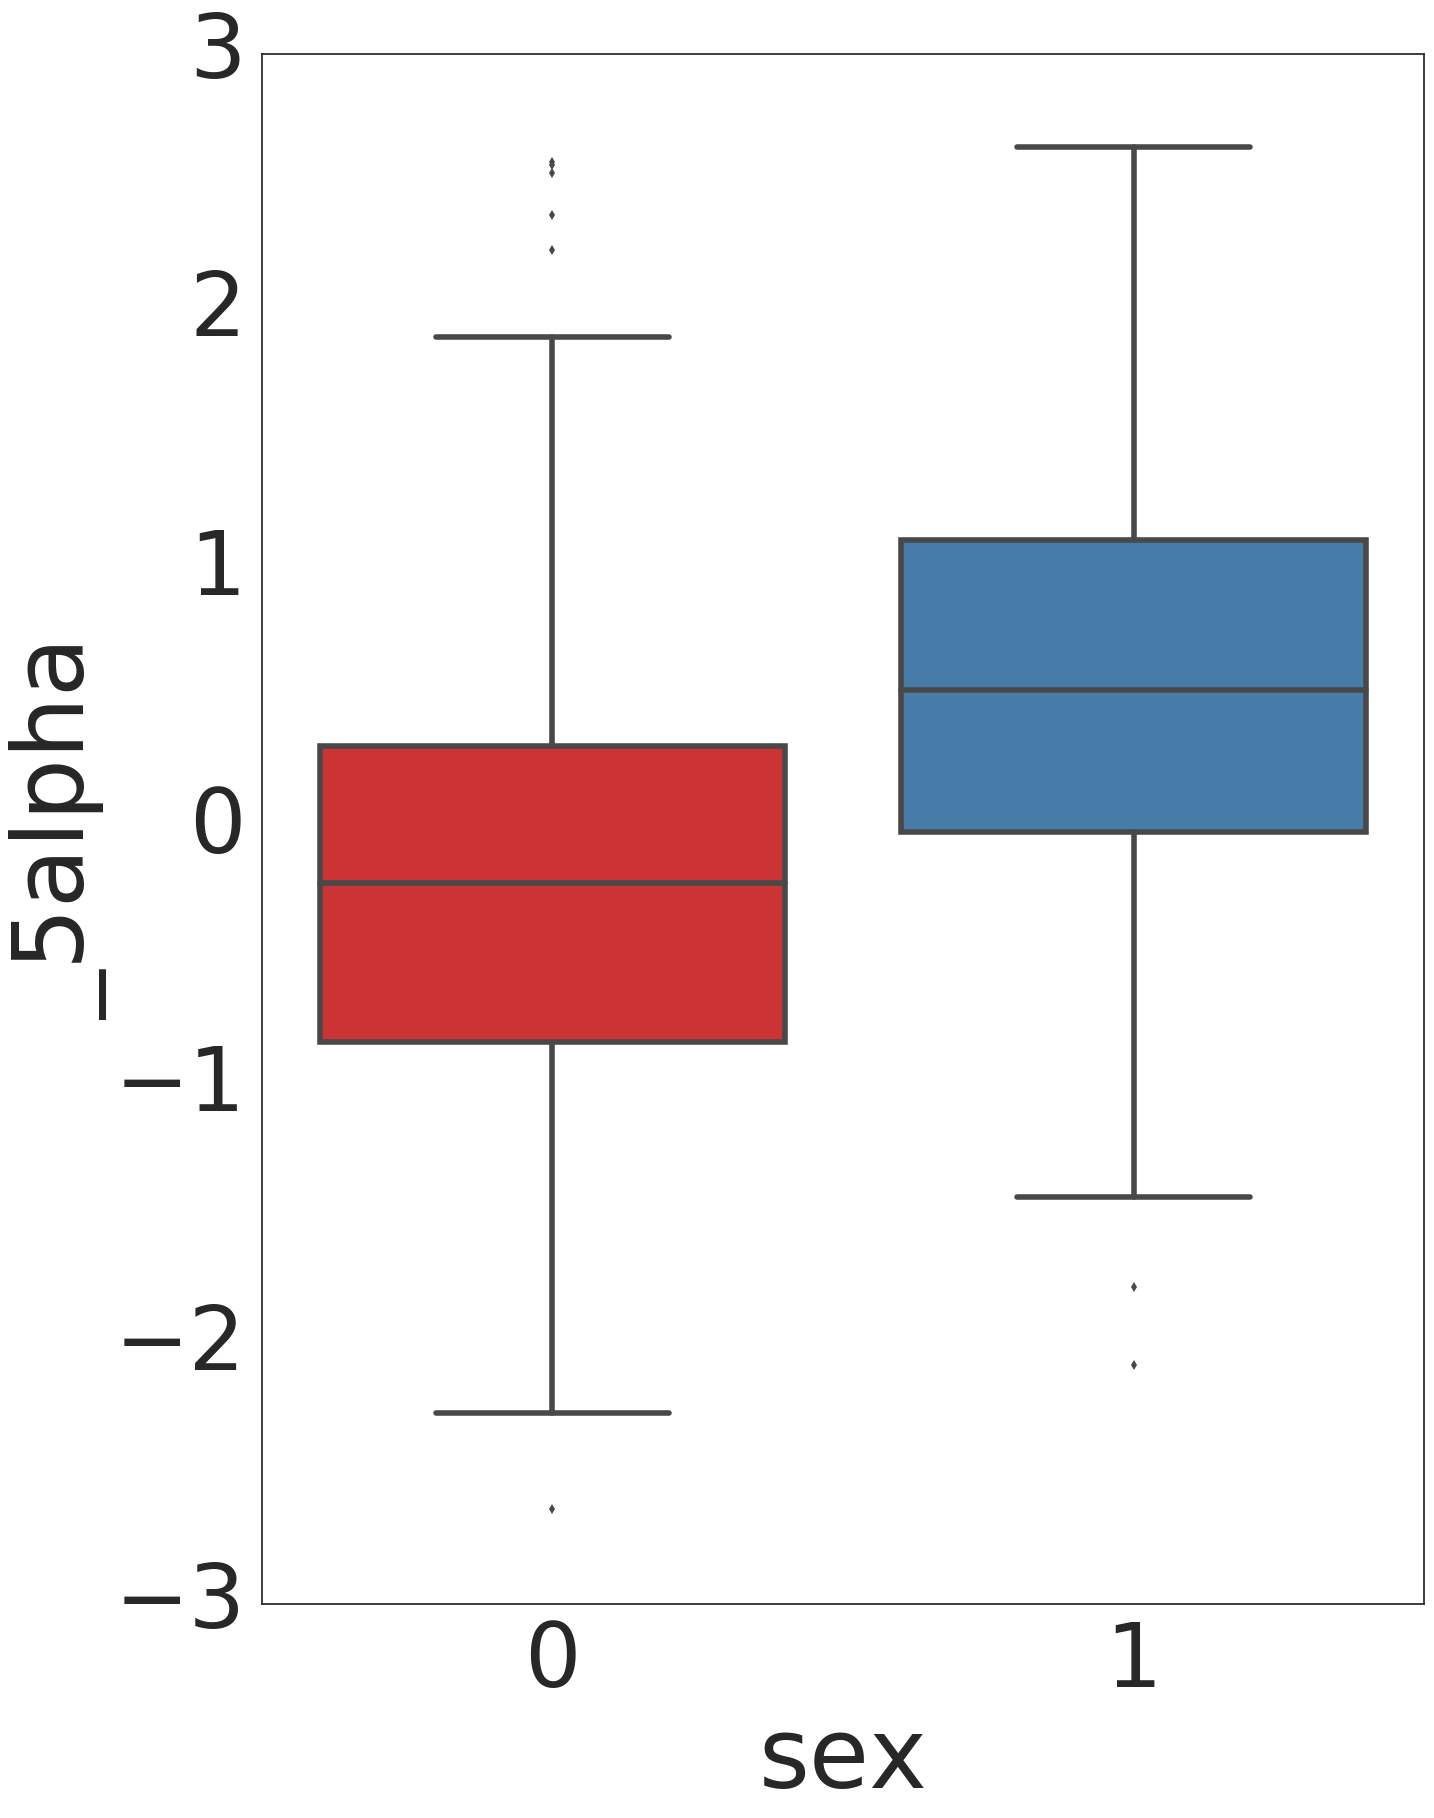

In [6]:
#Generate boxplot for figure 2B
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[15,20], dpi=100)
#plt.setp(bp['boxes'], color='black')
#plt.setp(bp['whiskers'], color='black')
meanlineprops = dict(linestyle='-', linewidth=3, color='Red')
ax=sns.boxplot(y=discovery_mets['_5alpha'],x=discovery_mets['sex'],order=[0,1], meanprops=meanlineprops,palette='Set1',showfliers=True,linewidth=4, meanline=True,showmeans=False)
#ax = sns.stripplot(x='Obesity', y='res', data=data_post, color="black",jitter=0.1, size=15)

In [7]:
#Regression analysis of differences in 5alpha-androstan-3beta across sex, adjusted for BMI and age.
import statsmodels.formula.api as smf
results = smf.ols('_5alpha ~ BMI+Age+sex', data=discovery_mets).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                _5alpha   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     18.11
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           4.95e-11
Time:                        04:01:41   Log-Likelihood:                -540.44
No. Observations:                 399   AIC:                             1089.
Df Residuals:                     395   BIC:                             1105.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1951      0.288      0.677      0.499      -0.372       0.762
BMI           -0.0174      0.007     -2.514      0.012      -0.031      -0.004
Age            0.0023      0.005      0.488      0.626      -0.007       0.012
sex            0.6935      0.106      6.524      0.000       0.485       0.902
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.929
Skew:                           0.106   Prob(JB):                        0.629
Kurtosis:                       3.103   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Figure 2C

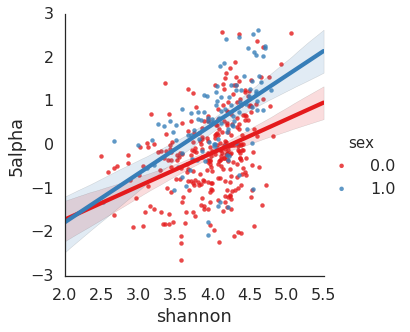

(0.41220589946424074, 8.471425863900576e-18)


In [8]:
#Generate scatter plot for Fig2C
sns.set(font_scale=1,context='poster',font='Arial',style='white')
plt.figure(figsize=[20,20], dpi=200)
ax=sns.lmplot('shannon','_5alpha', discovery_mets,hue='sex',palette='Set1',fit_reg=True)
ax.set_axis_labels('shannon', '5alpha')
plt.show()
print(scipy.stats.pearsonr(discovery_mets['shannon'],discovery_mets['_5alpha']))

# Figure 2D

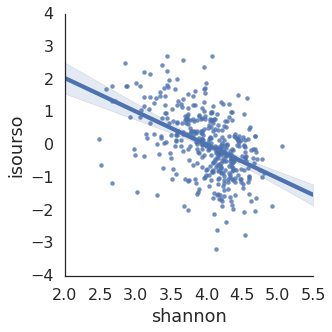

(-0.4609958660819048, 2.1801437608065734e-22)


In [9]:
#Generate scatter plot for figure 2D
discovery_mets['isourso']=X['root.metabolite.scaled.lipid.secondary_bile_acid_metabolism.isoursodeoxycholate:scaled']
sns.set(font_scale=1,context='poster',font='Arial',style='white')
plt.figure(figsize=[20,20], dpi=200)
ax=sns.lmplot('shannon','isourso', discovery_mets,palette='Set1',fit_reg=True)
ax.set_axis_labels('shannon', 'isourso')
plt.show()
print(scipy.stats.pearsonr(discovery_mets['shannon'],discovery_mets['isourso']))

# Figure 2E

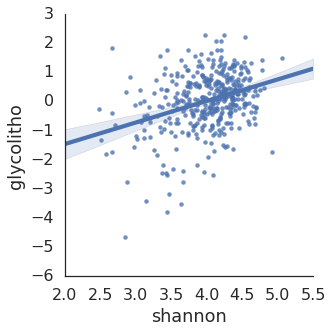

(0.33484376282329414, 6.568832660054047e-12)


In [10]:
discovery_mets['glycolitho']=X['root.metabolite.scaled.lipid.secondary_bile_acid_metabolism.glycolithocholate sulfate*:scaled']
sns.set(font_scale=1,context='poster',font='Arial',style='white')
plt.figure(figsize=[20,20], dpi=200)
ax=sns.lmplot('shannon','glycolitho', discovery_mets,palette='Set1',fit_reg=True)
ax.set_axis_labels('shannon', 'glycolitho')
plt.show()
print(scipy.stats.pearsonr(discovery_mets['shannon'],discovery_mets['glycolitho']))